In [3]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


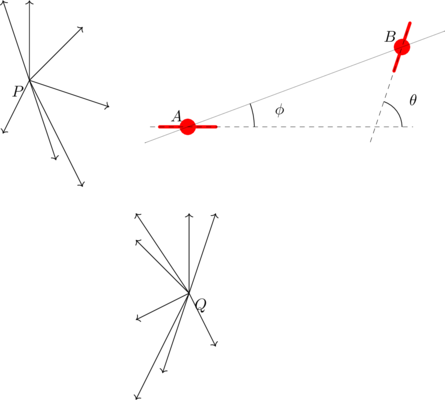

In [4]:
%%tikz -s 800,400 -sc 0.6 -f png -p tkz-euclide -S tikzSvg

\tkzInit[xmax=13, ymax=8]

\tkzDefPoint(2.95, 2.25){A}
\tkzDefPoint(11,5.25){B}
\tkzLabelPoints[above left](A,B)
\tkzDefPoint(10, 2.25){C}

% draw red dots at the center of edges
\tkzDrawPoints[size=10, color=red, fill=red](A,B)


%----------------------------------------------------------
% Drawing the lines and segments
%----------------------------------------------------------
\tkzDrawLine[color=red,line width=2pt, add=-1.15 and -.15 ](C,A)
\tkzDrawLine[color=red,line width=2pt, add=-1.3 and -.3 ](C,B)

\tkzDrawLine(A,B)
\tkzDrawLines[dashed](A,C B,C)

% drawing arcs for angles  
\tkzMarkAngle[size=2.5,mkpos=.2](C,A,B)
\tkzLabelAngle[pos=3.5,circle](C,A,B){$\mathsf{\phi}$}

\tkzDefPointWith[linear,K=1.5](A,C)
\tkzGetPoint{D}
\tkzDefPointWith[linear,K=.75](B,C)
\tkzGetPoint{E}
\tkzMarkAngle[size=1,mkpos=.2](D,C,E)
\tkzLabelAngle[pos=1.75,circle](D,C,E){$\mathsf{\theta}$}

\coordinate[label=below left:$P$] (P) at (-3,4)
coordinate[label=below right:$Q$](Q) at (3,-4);
\path[->] foreach \p/\dir in {P/+, Q/-}
    {(\p) edge +(\dir 0, 3) edge +(\dir -1, 3)
    edge +(\dir 2, 2) edge +(\dir -1,-2) edge +(\dir 1,-3)
    edge +(\dir 2,-4)} (P) edge +(3,-1) (Q) edge +(-2,-1) edge +(-2, 3);


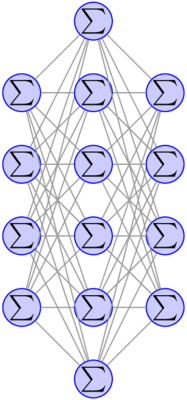

In [12]:
%%tikz -s 800,400 -sc 1. -f png 


\tikzset{sigNode/.style={
    draw=blue,
    fill=blue!20,
    circle,
    minimum size=15,
    label=center:{\small$\sum$}}
}
\foreach \N [count=\lay,remember={\N as \Nprev (initially 0);}]
           in {4,6,4}{ % loop over layers
\foreach \i [evaluate={\y=\N/2-\i; \x=\lay; \prev=int(\lay-1);}]
             in {1,...,\N}{ % loop over nodes
  \node[sigNode] (N\lay-\i) at (\x,\y) {};
  \ifnum\Nprev>0 % connect to previous layer
    \foreach \j in {1,...,\Nprev}{ % loop over nodes in previous layer
      \draw [thin, color=black!40!white] (N\prev-\j) -- (N\lay-\i);
    }
  \fi
}
}

In [54]:
preamble = r'''
\definecolor{zzttqq}{rgb}{0.4,0.6,0.1} 
\colorlet{myred}{red!80!black}
\colorlet{myblue}{blue!80!black}
\colorlet{mygreen}{green!60!black}
\colorlet{myorange}{orange!70!red!60!black}
\colorlet{mydarkred}{red!30!black}
\colorlet{mydarkblue}{blue!40!black}
\colorlet{mydarkgreen}{green!30!black}
\tikzstyle{node}=[thick,circle,draw=myblue,minimum size=22,inner sep=0.5,outer sep=0.6]
\tikzstyle{node in}=[node,green!20!black,draw=mygreen!30!black,fill=mygreen!25]
\tikzstyle{node hidden}=[node,blue!20!black,draw=myblue!30!black,fill=myblue!20]
\tikzstyle{node convol}=[node,orange!20!black,draw=myorange!30!black,fill=myorange!20]
\tikzstyle{node out}=[node,red!20!black,draw=myred!30!black,fill=myred!20]
\tikzstyle{connect}=[thick,mydarkblue] %,line cap=round
\tikzstyle{connect arrow}=[-{Latex[length=4,width=3.5]},thick,mydarkblue,shorten <=0.5,shorten >=1]
\tikzset{ % node styles, numbered for easy mapping with \nstyle
  node 1/.style={node in},
  node 2/.style={node hidden},
  node 3/.style={node out},
}
\def\nstyle{int(\lay<\Nnodlen?min(2,\lay):3)}

'''


In [5]:
preamble = '''
\definecolor{zzttqq}{rgb}{0.4,0.6,0.1} 
'''

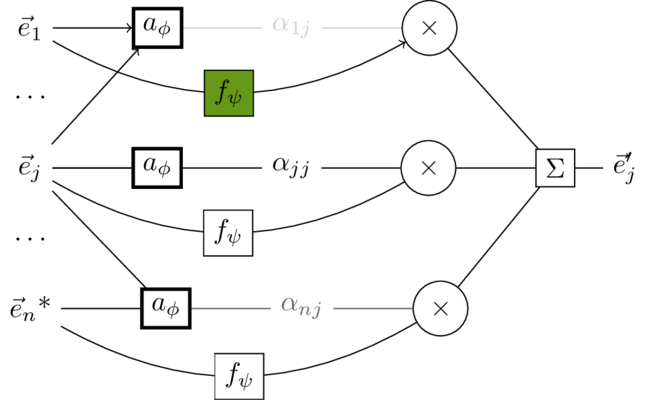

In [6]:
%%tikz -x $preamble -s 800,400 -sc 0.7 -f png -l arrows,positioning,shapes.geometric % NO spaces!!
 
\node (X1) {$\vec e_1$};
\node[rectangle, below=3ex of X1] (x_dots_1) {$\dots$};
\node[below=3ex of x_dots_1] (Xj) {$\vec e_j$};
\node[rectangle, below=3ex of Xj] (x_dots_2) {$\dots$};
\node[below=3ex of x_dots_2] (Xn) {$\vec e_n$*};

\node[rectangle, draw, very thick, right=of X1] (attn_1) {$a_\phi$};
\node[rectangle, draw, very thick, right=of Xj] (attn_j) {$a_\phi$};
\node[rectangle, draw, very thick, right=of Xn] (attn_n) {$a_\phi$};

\draw [->] (X1) edge (attn_1) (Xj) edge (attn_1);
\draw (Xj) edge (attn_j) ([xshift=3em]Xj) edge (attn_j);
\draw (Xj) edge (attn_n) (Xn) edge (attn_n);

\node[right=of attn_1, opacity=0.2] (alpha_1j) {$\alpha_{1j}$};
\node[right=of attn_j, opacity=1] (alpha_jj) {$\alpha_{jj}$};
\node[right=of attn_n, opacity=0.6] (alpha_nj) {$\alpha_{nj}$};

\node[circle, draw, right=of alpha_1j] (times_1) {$\times$};
\node[circle, draw, right=of alpha_jj] (times_j) {$\times$};
\node[circle, draw, right=of alpha_nj] (times_n) {$\times$};

\node[rectangle, draw, right=of times_j] (sum) {$\Sigma$};

\node[right=1em of sum] (x_tprim) {$\vec e_j'$};

\draw[opacity=0.2] (attn_1) -- (alpha_1j);
\draw[opacity=1] (attn_j) -- (alpha_jj);
\draw[opacity=0.6] (attn_n) -- (alpha_nj);

\draw [->] (X1) edge[bend right] node[rectangle, draw, fill=zzttqq, midway] {$f_\psi$} (times_1);
\draw (Xj) edge[bend right] node[rectangle, draw, fill=white, midway] {$f_\psi$} (times_j);
\draw (Xn) edge[bend right] node[rectangle, draw, fill=white, midway] {$f_\psi$} (times_n);

\draw (times_1) edge (sum) (times_j) edge (sum) (times_n) edge (sum);

\draw[opacity=0.2] (alpha_1j) -- (times_1);
\draw[opacity=1] (alpha_jj) -- (times_j);
\draw[opacity=0.6] (alpha_nj) -- (times_n);

\draw (sum) -- (x_tprim);



In [7]:
# From geogebra. 
preamble = '''
\definecolor{qqwuqq}{rgb}{0.,0.39215686274509803,0.}
\definecolor{wwttqq}{rgb}{0.4,0.2,0.}
\definecolor{zzttqq}{rgb}{0.6,0.2,0.}
\definecolor{cqcqcq}{rgb}{0.7529,0.7529,0.7529}
'''

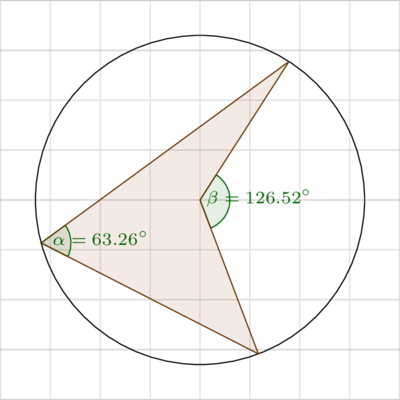

In [8]:
%%tikz -x $preamble -s 800,400 -sc 0.7 -f png -l arrows -p mathrsfs

\newcommand{\degre}{\ensuremath{^\circ}}   %Newcommand funkar!!

\draw [color=cqcqcq,, xstep=1.0cm,ystep=1.0cm] (-4.,-4.) grid (4.,4.);
\clip(-4.,-4.) rectangle (4.,4.);
\fill[color=zzttqq,fill=zzttqq,fill opacity=0.1] (0.,0.) -- (1.7836091303004733,2.7761013076450918) -- (-3.1852702365594565,-0.861425284100985) -- (1.1696435511209144,-3.085439022784482) -- cycle;
\draw [shift={(-3.1852702365594565,-0.861425284100985)},color=qqwuqq,fill=qqwuqq,fill opacity=0.1] (0,0) -- (-27.052975989046057:0.6) arc (-27.052975989046057:36.2064318140675:0.6) -- cycle;
\draw [shift={(0.,0.)},color=qqwuqq,fill=qqwuqq,fill opacity=0.1] (0,0) -- (-69.23903512657911:0.6) arc (-69.23903512657911:57.27978047964801:0.6) -- cycle;
\draw(0.,0.) circle (3.299696955782455cm);
\draw [color=wwttqq] (0.,0.)-- (1.7836091303004733,2.7761013076450918);
\draw [color=wwttqq] (1.7836091303004733,2.7761013076450918)-- (-3.1852702365594565,-0.861425284100985);
\draw [color=wwttqq] (-3.1852702365594565,-0.861425284100985)-- (1.1696435511209144,-3.085439022784482);
\draw [color=wwttqq] (1.1696435511209144,-3.085439022784482)-- (0.,0.);
\begin{scriptsize}
\draw[color=qqwuqq] (-2.,-0.76) node {$\alpha = 63.26\textrm{\degre}$};
\draw[color=qqwuqq] (1.18,0.04) node {$\beta = 126.52\textrm{\degre}$};
\end{scriptsize}

In [9]:
from IPython.display import display, Latex
for i in range(3):
    display(Latex(f'$\Huge x_{i}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

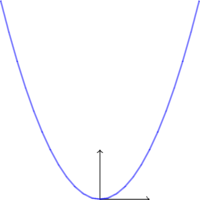

In [10]:
%%tikz -s 200,200 -sc 1 -f png
\draw [<->] (0,1) -- (0,0) -- (1,0);
\draw[blue,thick, domain=-2:2] plot (\x, {\x*\x});

In [11]:
# From geogebra. 
preamble = '''
\definecolor{qqwuqq}{rgb}{0.,0.39215686274509803,0.}
\definecolor{uuuuuu}{rgb}{0.26666666666666666,0.26666666666666666,0.26666666666666666}
\definecolor{ffwwqq}{rgb}{1.,0.4,0.}
\definecolor{navyblue}{rgb}{0.36, 0.56, 0.66}
'''

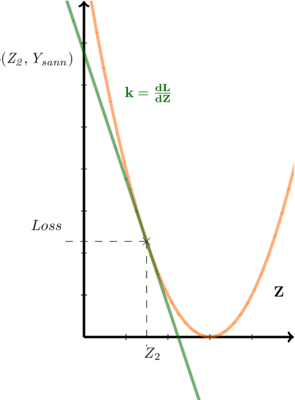

In [12]:
%%tikz -s 400,400 -sc 1. -x $preamble -f png -l arrows -p pgf,mathrsfs


\draw[->,ultra thick,color=black] (0.,0.) -- (5.,0.);
\foreach \x in {,1.,2.,3.,4.}
\draw[shift={(\x,0)},color=black] (0pt,2pt) -- (0pt,-2pt);
\draw[->,ultra thick,color=black] (0.,0.) -- (0.,8.);
\foreach \y in {,1.,2.,3.,4.,5.,6.,7.}
\draw[shift={(0,\y)},color=black] (2pt,0pt) -- (-2pt,0pt);
\clip(-2.,-1.5) rectangle (5.,8.);
\draw [samples=50,rotate around={0.:(3.,0.)},xshift=3.cm,yshift=0.cm,line width=2.pt,color=ffwwqq,domain=-4.0:4.0)] plot (\x,{(\x)^2/2/0.5});
\draw [dash pattern=on 5pt off 5pt] (1.4910188529059156,2.2770241022853788)-- (1.494837528537451,-0.22297298125620424);
\draw [yshift=-.3cm] (1.306995665007531,0.17116651207643882) node[anchor=north west] {$Z_2$};
\draw (4.396043230862615,1.327494477904545) node[anchor=north west] {$\mathit{\textbf{Z}}$};
\draw [xshift=-.5cm] (-1.8316088136687574,6.910906655760258) node[anchor=north west] {$\mathit{{L(Z_2,Y_{sann})}}$};
\draw (-1.3855965982779164,2.913315688183091) node[anchor=north west] {$Loss$};
\draw [line width=2.pt, color=qqwuqq,domain=-1.:5.] plot(\x,{(--3.388431390139563-1.5089811470940844*\x)/0.5});
\draw [dash pattern=on 5pt off 5pt] (1.4910188529059156,2.2770241022853788)-- (-0.5089811470940844,2.2770241022853788);
\draw [color=qqwuqq](0.8444644786762885,6.151033992501788) node[anchor=north west] {$\mathbf{k=\frac{dL}{dZ}}$};
\draw [color=uuuuuu] (1.4910188529059156,2.2770241022853788)-- ++(-2.5pt,-2.5pt) -- ++(5.0pt,5.0pt) ++(-5.0pt,0) -- ++(5.0pt,-5.0pt);
\draw[color=qqwuqq] (-1.9307226393111665,12.956850019947215) node {$i$};

In [13]:
preamble = '''
\definecolor{ffwwqq}{rgb}{1.,0.4,0.}
\definecolor{navyblue}{rgb}{0.36, 0.56, 0.66}
'''

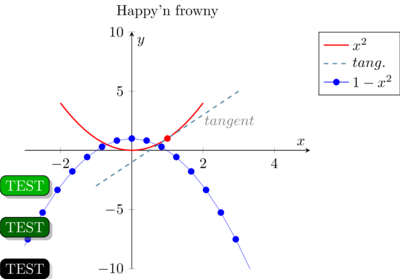

In [14]:
%%tikz -s 400,400 -sc 1. -f png -p pgfplots -l shadows -x $preamble
%\section{2D plot} INGA SECTIONS
\begin{axis}[axis lines=middle,  %på "axis" MÅSTE [] vara EFTER {}
     legend cell align=left,
	 legend pos=outer north east,
     ymax=10,
     ymin=-10,
     xmin=-3,
     xmax=5,
     mark = none,
     xlabel=$x$,
     ylabel=$y$,
     title={Happy'n frowny}]
\addplot[red, thick, domain=-2:2]{x^2}; %mark=none på "addplot" funkar BARA om [] är FÖRE {}
%\addlegendentry{$added$}
\addplot[thick, navyblue, dashed, mark = none, domain=-1:3] {2*x-1} node [below right=-1mm, pos=0.75, black!50!white] {$\tiny{tangent}$};               
\addplot[color=blue, mark = *]{1-x^2};
\addplot[red, mark=*, only marks] coordinates {(1,1)};
\legend{$x^2$, $tang.$, $1-x^2$}  % Legends enligt addplot-ordning
\end{axis}
\node[drop shadow,fill=black,draw,rounded corners]{\textcolor{white}{TEST}};
\node at (0,1) [drop shadow,fill=black!60!green,draw,rounded corners]{\textcolor{white}{TEST}};
\node at (0,2) [drop shadow,fill=black!30!green,draw,rounded corners]{\textcolor{white}{TEST}};

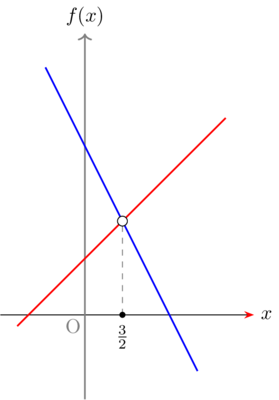

In [145]:
%%tikz -s 800,400 -sc 1. -f png -l arrows.meta -p pgfplots
%\begin{tikzpicture}  % this CROPS picture!!! randomly
  \draw (0.05,-0.2) node[left, text=gray]{O};
  \draw [-{Stealth[red]}] (-1.5,0) -- (3,0) node[right, black] {$x$};
  \draw [thick, draw=gray, ->] (0,-1.5) -- (0,5) node[above, black] {$f(x)$};
  \draw [red, thick, domain=-1.2:2.5, samples=100] plot(\x, {(\x)+1});
  \draw [blue, thick, domain=-0.7:2, samples=100] plot(\x, {3-2*(\x)});
  \draw[gray, dashed] (2/3,0)--(2/3,5/3);
  \node[circle,fill=black,inner sep=0pt,minimum size=3pt,label=below:{$\frac{3}{2}$}] (a) at (2/3,0) {};
  \node[circle,draw=black, fill=white, inner sep=0pt,minimum size=5pt] (b) at (2/3,5/3) {};
%\end{tikzpicture}


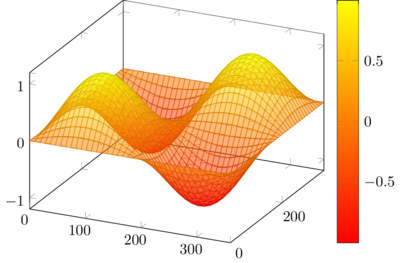

In [15]:
%%tikz -s 400,400 -sc 1. -f png -l arrows.meta -p pgfplots
\begin{axis}[colormap/redyellow,colorbar]
	\addplot3[surf,
		domain=0:360,samples=40] 
		{sin(x)*sin(y)};	
\end{axis}

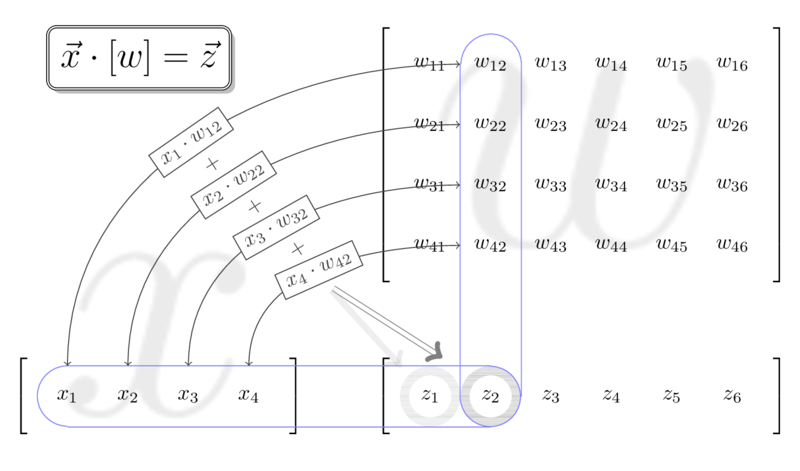

In [16]:
%%tikz -s 800,800 -sc 1. -S matrixMul.png -f png -l fit,calc,matrix,arrows,shadows -p verbatim,graphicx

\newcommand{\myunit}{1 cm}
\tikzset{
    node style sp/.style={draw,circle,minimum size=\myunit},
    node style ge/.style={circle,minimum size=\myunit},
    arrow style mul/.style={draw,sloped,midway,fill=white},
    arrow style plus/.style={midway,dashed,sloped,fill=white},
}

\tikzset{
  nodeStyle2/.style={
    circle,
    minimum size=1cm,
    inner sep=0pt,
    path picture={
      \draw[fill=black!20!white, draw = none, even odd rule ] (path picture bounding box.center) circle [radius=0.5cm]
                                                (path picture bounding box.center) circle [radius=0.35cm];
    },
    font=\small
  }
}

\node[opacity=.08] at (7,4) {\includegraphics[width=7cm]{w}};
\node[opacity=.08] at (0,1) {\includegraphics[width=5cm]{x}};
\node [draw, fill=white, double, rounded corners, drop shadow, inner sep=6pt, xshift=-9pt, yshift=3pt] (n) at (0,5.5) {\fontsize{18}{20}\selectfont $\vec{x}\cdot[w]=\vec{z}$};
                  
\matrix (W) [matrix of math nodes,
             nodes = {node style ge},
             left delimiter  = {[},
             right delimiter = {]}] at (7,4)
{
  w_{11} & w_{12} & w_{13} & w_{14} & w_{15} & w_{16} \\
  w_{21} & w_{22} & w_{23} & w_{24} & w_{25} & w_{26} \\
  w_{31} & w_{32} & w_{33} & w_{34} & w_{35} & w_{36} \\
  w_{41} & w_{42} & w_{43} & w_{44} & w_{45} & w_{46} \\
};

 

\matrix (X) [matrix of math nodes,
             nodes = {node style ge},
             left delimiter  = {[},
             right delimiter = {]}] at (0,0)
{
  x_1 & x_2 & x_3 & x_4  \\
};

\matrix (Z) [matrix of math nodes,
             nodes = {node style ge},
             left delimiter  = {[},
             right delimiter = {]}] at (7,0)
{
  z_1 & z_2 & z_3 & z_4 & z_5 & z_6  \\
};
\node[nodeStyle2, opacity=.5] at (Z-1-1.center) {};
\node[nodeStyle2] at (Z-1-2.center) {};
\draw[blue!50] (W-1-2.east) arc (0:180:.5);
\draw[blue!50] (X-1-1.north) arc (90:270:.5);
\draw[blue!50] (Z-1-2.west) arc (180:450:.5);

% Blue lines
\draw[blue!50] (X-1-1.north) -- (Z-1-2.north);
\draw[blue!50] (X-1-1.south) -- (Z-1-2.south);
\draw[blue!50] (W-1-2.west)  -- (Z-1-2.west);
\draw[blue!50] (W-1-2.east)  -- (Z-1-2.east);

% Bent lines between matrix and vector
\draw[<->,darkgray](X-1-1) to[in=180,out=90]
	node[arrow style mul] (x) {$x_1\cdot w_{12}$} (W-1-2);
\draw[<->,darkgray](X-1-2) to[in=180,out=90]
	node[arrow style mul] (y) {$x_2\cdot w_{22}$} (W-2-2);
\draw[<->,darkgray](X-1-3) to[in=180,out=90]
	node[arrow style mul] (w) {$x_3\cdot w_{32}$} (W-3-2); 
\draw[<->,darkgray](X-1-4) to[in=180,out=90]
	node[arrow style mul] (z) {$x_4\cdot w_{42}$} (W-4-2); 
    
\node[rotate=33, darkgray] at ($(x)!.5!(y)$) {$+$};
\node[rotate=33, darkgray] at ($(y)!.5!(w)$) {$+$};
\node[rotate=33, darkgray] at ($(w)!.5!(z)$) {$+$};

\draw[->, double, double distance=2pt, gray, shorten >= 1.5em, shorten <= .5em] (z.south)--(Z-1-2.north west);
\draw[->, double, opacity=.15,double distance=2pt, gray, shorten >= 0.5em, shorten <= .5em] (z.south)--(Z-1-1.north west);




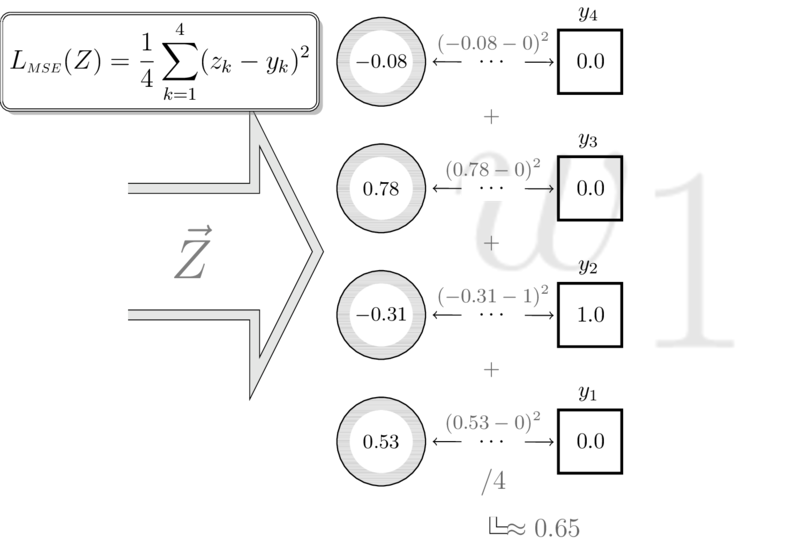

In [22]:
%%tikz -s 800,800 -sc 1. -f png -l math,shadows,calc -p amsmath,scalerel,graphicx

\tikzset{
  nodeStyle2/.style={
    circle,
    draw=black,
    line width=0.5pt,
    minimum size=1.4cm,
    inner sep=0pt,
    path picture={
      \draw[fill=black!20!white, draw = none, even odd rule ] (path picture bounding box.center) circle [radius=0.7cm]
                                                (path picture bounding box.center) circle [radius=0.5cm];
    },
    font=\small
  }
}

    
\node[opacity=.1] at (8.5,4) {\includegraphics[width=6cm]{Y}};

%\pgfsetcornersarced{\pgfpoint{1mm}{(Y-\name)1mm}}
%\draw[step=1cm, black!30!white] (0,0) grid (8,8);
\node[nodeStyle2] (nc4) at (5,7) {$-0.08$};
\node[nodeStyle2] (nc3) at (5,5) {$0.78$};
\node[nodeStyle2] (nc2) at (5,3) {$-0.31$};
\node[nodeStyle2] (nc1) at (5,1) {$0.53$};



\draw[double=black!10!white, double distance=4pt] (1,5)--++(2,0)--++(0,1)--++(1,-2)--++(-1,-2)--++(0,1)--++(-2,0);
\foreach \i/\yval in {0/0.0,1/0.0,2/1.0,3/0.0} {
    \tikzmath{\idx=int(4-\i);}
    \tikzmath{\y = (\idx-1)*2+.5;}
    \draw[very thick] (7.8,\y) rectangle +(1,1) node[above, xshift=-1.5em] (nr\idx) {$y_{\idx}$};
    \node[yshift=-2.1em, xshift=.1em] at (nr\idx) {\yval};
}
%tipex och skriv 1.0
%\node[rectangle, fill=white, yshift=-2em] at (nr2) {1.0};

\foreach \i/\j/\k in {1/0.53/0, 2/-0.31/1, 3/0.78/0 , 4/-0.08/0} {
\draw [<->] ([xshift=.3em] nc\i.east) -- ([xshift=-.7em, yshift=-2.15em] nr\i.west)
    node[rectangle, minimum width = 1cm,fill=white, midway] (nm\i) {$\cdots$};
\node [above, black!60!white] at (nm\i) {\small $(\j-\k)^2$};
}
\foreach \i in {4,3,2} {
    \tikzmath{\k=\i-1;}
    \node[black!60!white, yshift=0.4em, xshift=-.8em] (b) at ($(nm\i)!0.5!(nm\k)$) {$+$};
}

\node[opacity=.5] at (2,4) {\Huge$\vec{Z}$};
    
    
\node [draw, fill=white, double, rounded corners, drop shadow] (n) at (1.5,7) {\large$L_{{\scaleto{MSE}{4pt}}}(Z)=\dfrac{1}{4}\displaystyle\sum_{k=1}^{4} (z_k-y_k)^2$};

\draw [double, double distance = 2.5pt] ([yshift=-2.8em]nm1.south)|-(7,-0.4)
    node (nBend)[midway, black!60!white, above, yshift=1.2em] {\large$/4$};
\node[xshift=1.6em, yshift=1pt, black!60!white] at (7,-0.4) {\large$\approx 0.65$};
    
       

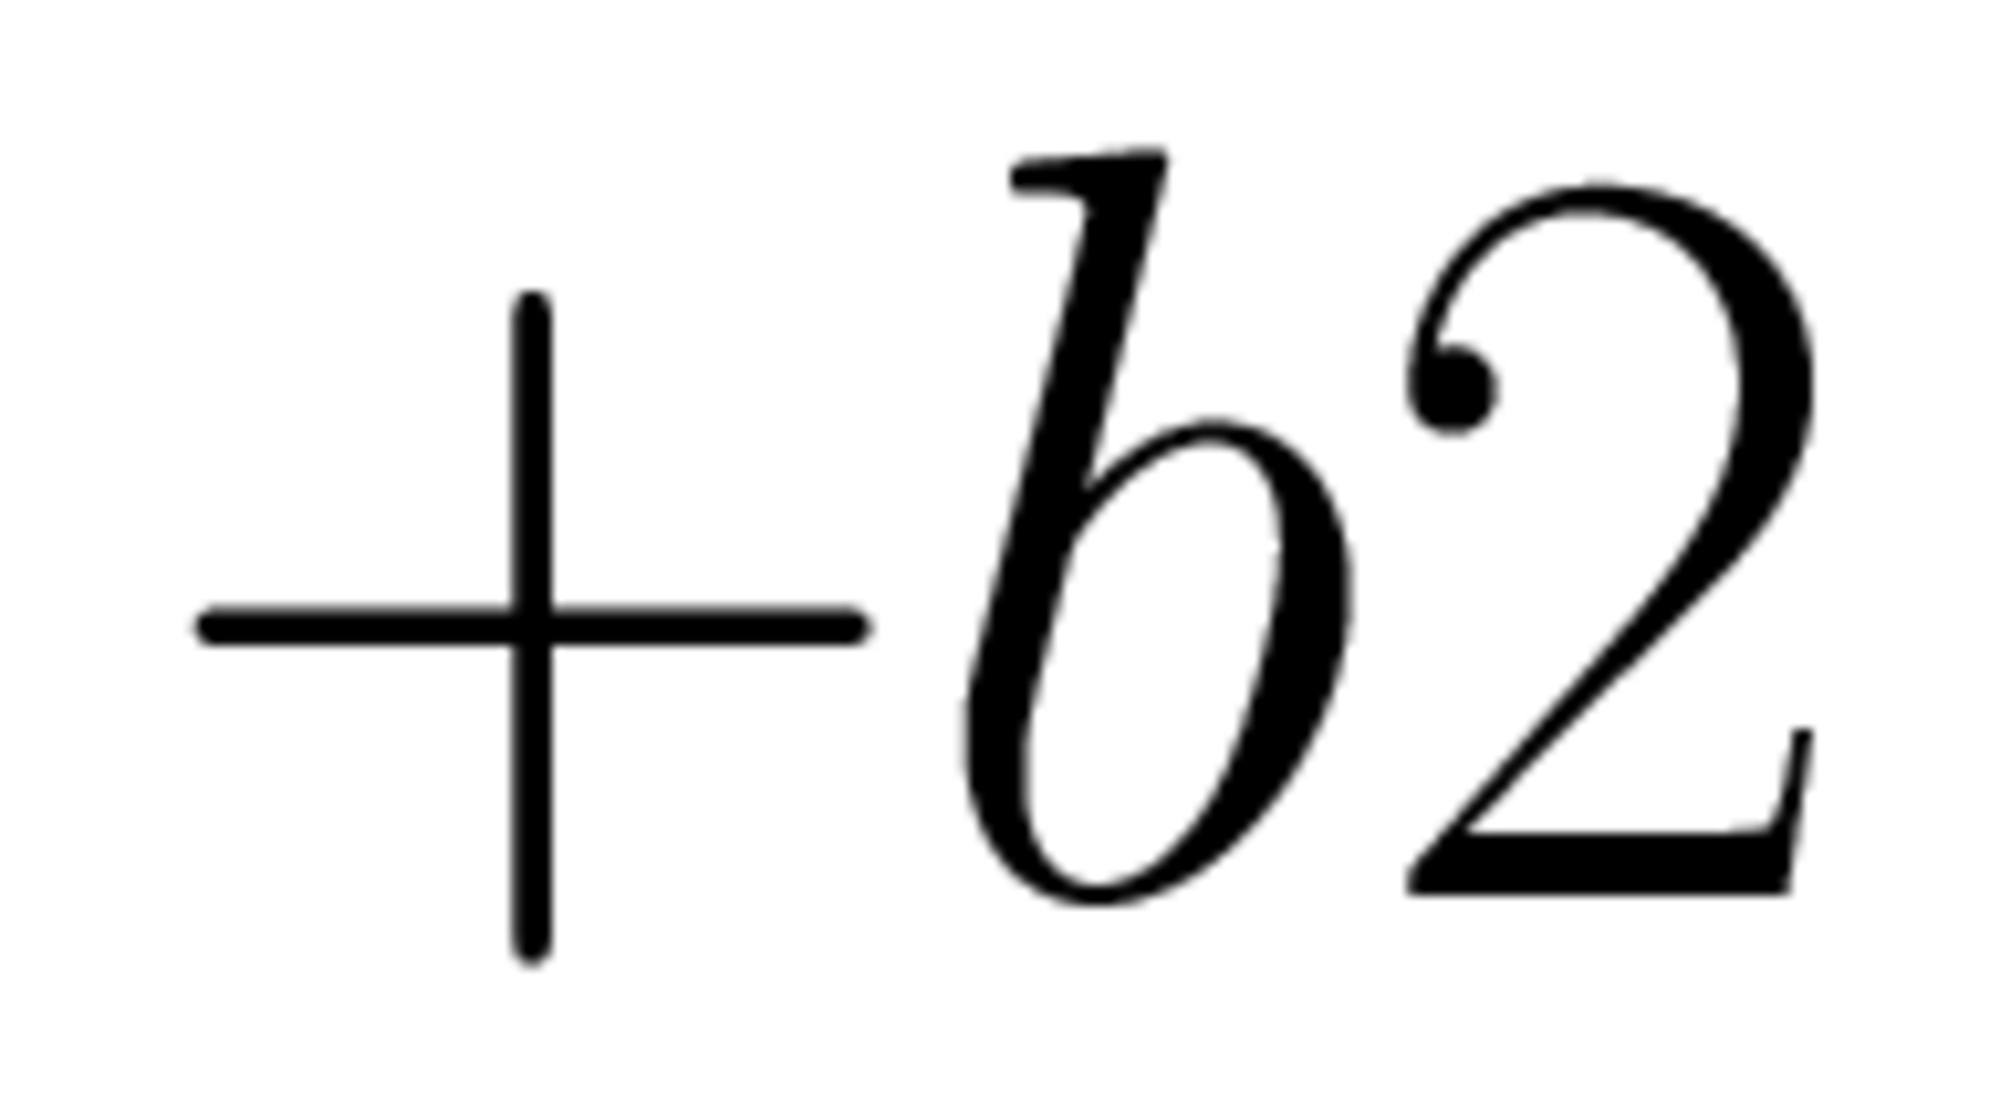

In [148]:
%%tikz -s 2000,2000 -sc 1 -f png -p scalerel,graphicx -S b2.png

%\draw (1,1)--(2,2);
%\node (n) at (0,0) {\fontsize{200}{240}\selectfont $w_{\scaleto{1}{4pt}}$};
\node (n) at (0,0) {\fontsize{200}{240}\selectfont $+b2$};


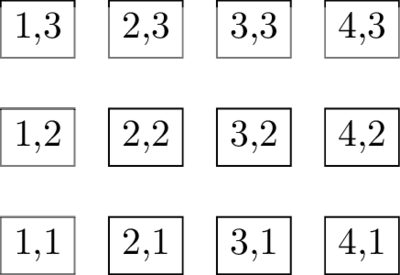

In [145]:
%%tikz -s 400,400 -sc 1 -f png
\node foreach \x in {1,...,4} foreach \y in {1,2,3}
            [draw] at (\x,\y) {\x,\y};

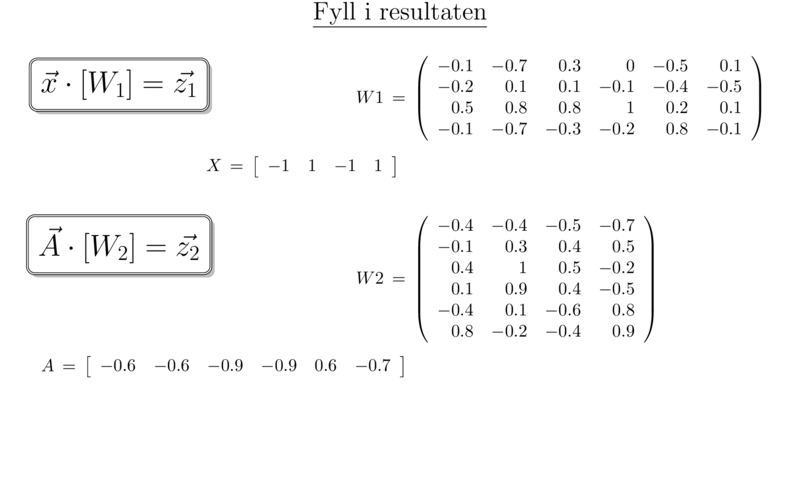

In [35]:
%%tikz -s 800,800 -sc 1. -f png -l arrows,shadows -p mathrsfs

\node [draw, fill=white, double, rounded corners, drop shadow, inner sep=6pt, xshift=-9pt, yshift=3pt] (n) at (-5.3,2) {\fontsize{18}{20}\selectfont$\vec{A}\cdot[W_2]=\vec{z_2}$ };                                                                
\node [draw, fill=white, double, rounded corners, drop shadow, inner sep=6pt, xshift=-9pt, yshift=3pt] (n) at (-5.3,5.2) {\fontsize{18}{20}\selectfont$\vec{x}\cdot[W_1]=\vec{z_1}$ };
\clip(-8.,-3.) rectangle (8.,7.);
\draw (-1,6) node[anchor=north west] {$W1 \, = \,\left(\begin{array}{rrrrrr}-0.1&-0.7&0.3&0&-0.5&0.1\\-0.2&0.1&0.1&-0.1&-0.4&-0.5\\0.5&0.8&0.8&1&0.2&0.1\\-0.1&-0.7&-0.3&-0.2&0.8&-0.1\\ \end{array}\right)$};
\draw (-4,4) node[anchor=north west] {$X \, = \,\left[\begin{array}{rrrr}-1&1&-1&1\\ \end{array}\right]$};
\draw (-0.75,4) node[anchor=north west, opacity=0] {$\phantom{Z1 \, = \,}\left(\begin{array}{rrrrrr}-0.7&-0.7&-1.3&!-1.3~&0.7&-0.8\\ \end{array}\right)$};
\draw (-1,2.8) node[anchor=north west] {$W2 \, = \,\left(\begin{array}{rrrr}-0.4&-0.4&-0.5&-0.7\\-0.1&0.3&0.4&0.5\\0.4&1&0.5&-0.2\\0.1&0.9&0.4&-0.5\\-0.4&0.1&-0.6&0.8\\0.8&-0.2&-0.4&0.9\\ \end{array}\right)$};
\draw (-7.3,0) node[anchor=north west] {$A \, = \,\left[\begin{array}{rrrrrr}-0.6&-0.6&-0.9&-0.9&0.6&-0.7\\ \end{array}\right]$};
\draw (-.9,0) node[anchor=north west, opacity=0] {$\phantom{Z2 \, = \,}\left(\begin{array}{rrrr}-0.95&-1.45&-0.83&0.6\\ \end{array}\right)$};

\node (title) at (0,6.7) {\Large \underline{Fyll i resultaten}};


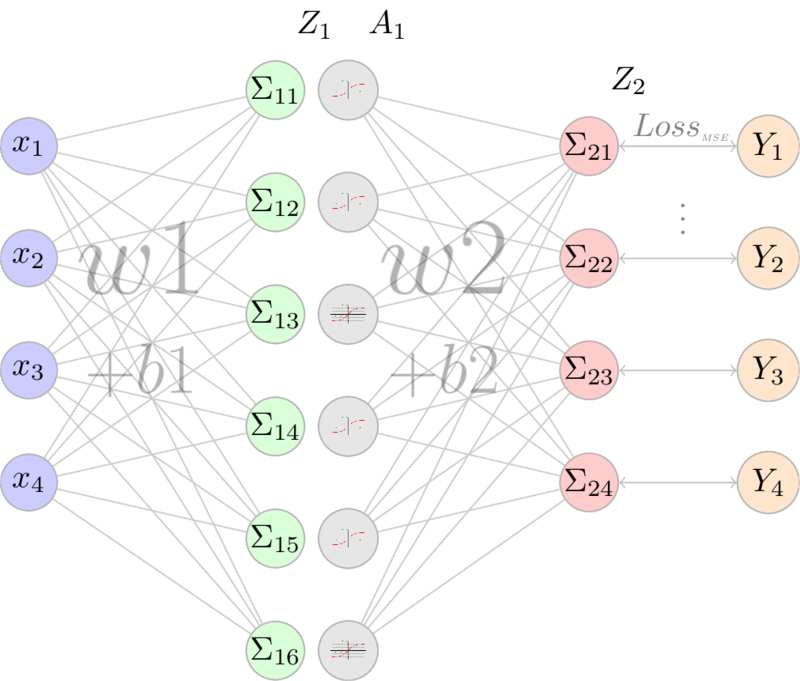

In [36]:
%%tikz -s 800,800 -sc 1.2 -f png -p scalerel,graphicx -S 4x6x4.png

    % define styles
    every edge/.style={
        draw,
        ->,
        thin,
        shorten >=1pt,
        shorten <=1pt,
        >=stealth
    },
    every node/.style={
        align=center
    },
    edge from parent/.style={
        draw,
        ->,
        ultra thin,
        shorten >=1pt,
        shorten <=1pt,
        >=stealth
    }
]

% Draw the input layer nodes
\foreach \name / \y in {1,...,4}
    \node[circle,fill=blue!20,minimum size=17pt,inner sep=2pt,draw=black!30] (I-\name) at (0,-\y) {$x_{\name}$};

% Draw the hidden layer nodes
\foreach \name / \y in {1,...,6} {
    \path[yshift=0.5cm]
        node[circle,radius=17pt,fill=green!15,minimum size=17pt,inner sep=0pt,draw=black!30] (H-\name) at (2.2,-\y) {$\Sigma_{1\name}$};
    \path[yshift=0.5cm, xshift=0.55cm]
        node[draw=black!30,circle,radius=17pt,fill=black!10,minimum size=17pt,inner sep=2pt] (A-\name) at (2.3,-\y) {\includegraphics[scale=0.03]{tanh2}};
}
% Draw the output layer node
\foreach \name / \y in {1,...,4} {
    \node[circle,radius=17pt,fill=red!20,minimum size=17pt,inner sep=0pt, draw=black!30] (O-\name) at (5,-\y) {$\Sigma_{2\name}$};
    \node[circle,radius=17pt,fill=orange!20,minimum size=17pt,inner sep=2pt, draw=black!30] (Y-\name) at (6.6,-\y) {$Y_{\name}$};
    \draw[<->, black!25] (O-\name)--(Y-\name);
}
% Connect every node in the input layer with every node in the
% hidden layer.
\foreach \source in {1,...,4}
    \foreach \dest in {1,...,6}
        \path (I-\source) edge[black!20] (H-\dest);

% Connect every node in the activation layer with the output layer
\foreach \source in {1,...,6}
    \foreach \dest in {1,...,4}
        \path (A-\source) edge[black!20] (O-\dest);

% Annotate the layers
\node[above of=H-1, node distance=.7cm, xshift = 1.2em] (hl) {$Z_1$};
\node[above of=A-1, node distance=.7cm, xshift = 1.2em] (al) {$A_1$};
\node[above of=O-1, node distance=.7cm, xshift = 1.2em] (ol) {$Z_2$};
%\node[left of=hl] {$Input layer$};
%\node[right of=hl] {$Output layer$};


\node[above of=O-1, node distance=2mm, xshift = 2.8em, gray] (loss) {$Loss_{\scaleto{MSE}{2pt}}$};
\node[right of=O-2, gray, yshift=1.5em] (dots) {$\vdots$};

\node[opacity=.3] at (1,-2) {\includegraphics[width=1.7cm]{w1}};
\node[opacity=.3] at (3.7,-2) {\includegraphics[width=1.7cm]{w2}};
\node[opacity=.3] at (1,-3) {\includegraphics[width=1.4cm]{b1}};
\node[opacity=.3] at (3.7,-3) {\includegraphics[width=1.4cm]{b2}};

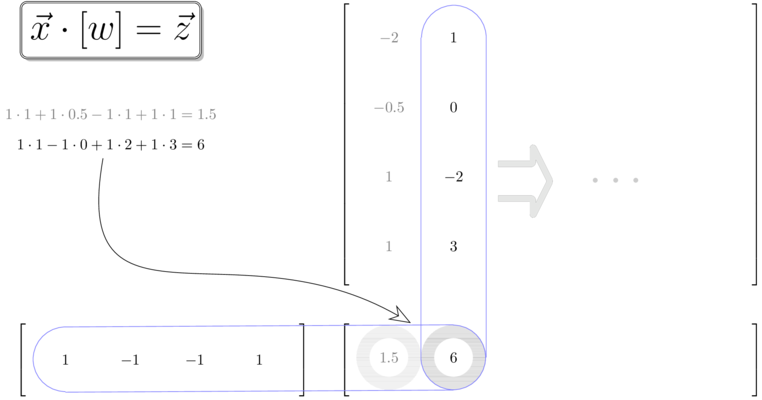

In [37]:
%%tikz -s 800,400 -sc 1. -S matMulSiffror.png -f png -l fit,calc,matrix,math,shadows,positioning,arrows,arrows.meta

\newcommand{\myunit}{1.5 cm}
\tikzset{
    matStyle/.style={circle,minimum size=\myunit}
}

\tikzmath{\halfunit=\myunit/2;
            \quartunit=\myunit-3mm;
}

\tikzset{
  nodeStyle2/.style={
    circle,
    minimum size=\myunit,
    inner sep=0pt,
    path picture={
     \draw[fill=black!20!white, draw = none, even odd rule ] (path picture bounding box.center) circle [radius=\halfunit]
                                                (path picture bounding box.center) circle [radius=0.45 cm];
    },
    font=\small
  }
}

\node [draw, fill=white, double, rounded corners, drop shadow, inner sep=6pt] (n) at (-1.2,7.65) {\fontsize{30}{40}\selectfont $\vec{x}\cdot[w]=\vec{z}$};
                  
\matrix (W) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (9,5)
{
  |[gray]|-2 & 1 & {} & {} & {} & {} \\
  |[gray]|-0.5 & 0 & {} & {} & {} & {} \\
  |[gray]|1 & -2 & {} & {} & {} & {} \\
  |[gray]|1 & 3 & {} & {} & {} & {} \\
};

 

\matrix (X) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (0,0)
{
  {1} & {-1} & {-1} & {1}\\
};

\matrix (Z) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (9,0)
{
  |[gray]|1.5 & {6} & {} & {} & {} & {}\\
};
\node[nodeStyle2, opacity=.5] at (Z-1-1.center) {};
\node[nodeStyle2] at (Z-1-2.center) {};
\draw[blue!50] (W-1-2.east) arc (0:180:.75);
\draw[blue!50] (X-1-1.north) arc (90:270:.75);
\draw[blue!50] (Z-1-2.west) arc (180:450:.75);

% Blue lines
\draw[blue!50] (X-1-1.north) -- (Z-1-2.north);
\draw[blue!50] (X-1-1.south) -- (Z-1-2.south);
\draw[blue!50] (W-1-2.west)  -- (Z-1-2.west);
\draw[blue!50] (W-1-2.east)  -- (Z-1-2.east);

\node [below=5em of n.south] (arit) {$1 \cdot 1 -1 \cdot 0+1\cdot 2+1 \cdot 3=6$};
\node [below=3em of n.south, gray] (arit) {$1 \cdot 1 +1 \cdot 0.5 -1\cdot 1 + 1 \cdot 1=1.5$};
%\node at ($(X-1-3)!(W-3-2)!90$) (newNode) {asjdhsk};
\draw [-{Stealth[length=5mm, open]}, shorten >= 1.5em, shorten <= 2.2 em] (arit) to [out=260,in=150,looseness=1.5] (Z-1-2.north west);

% Stor pil o stora dots
{   %  För att runda hörn bara ska vara lokala
\pgfsetcornersarced{\pgfpoint{.5mm}{.5mm}}
\draw[double=black!10!white, double distance=4pt, scale =0.4, line width=0pt] ([xshift=2em, yshift=2.2em]W-3-2.east)--++(2,0)--++(0,1)--++(1,-2)--++(-1,-2)--++(0,1)--++(-2,0);
}
\node[black!20!white, scale=3] at (W-3-4.east) (dotsNode) {$\cdots$};




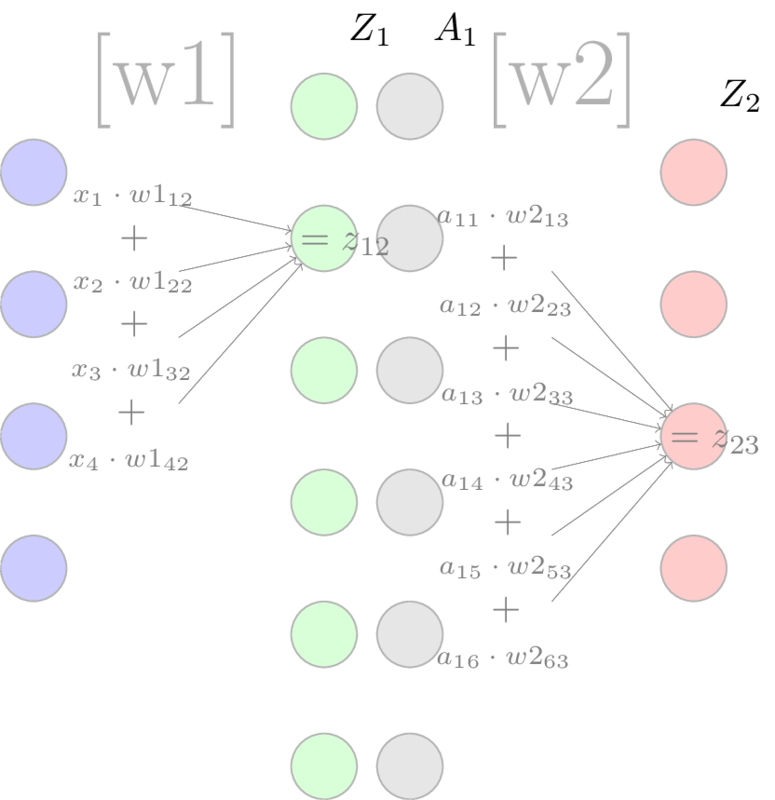

In [3]:
%%tikz -s 800,800 -sc 1.2 -f png -l calc -p scalerel,graphicx -S matMulDim.png

    % define styles
    every edge/.style={
        draw,
        ->,
        thin,
        shorten >=1pt,
        shorten <=1pt,
        >=stealth
    },
    every node/.style={
        align=center
    },
    edge from parent/.style={
        draw,
        ->,
        ultra thin,
        shorten >=1pt,
        shorten <=1pt,
        >=stealth
    }
]

%DRAW NODES
% Draw the input layer nodes
\foreach \name / \y in {1,...,4}
    \node[circle,fill=blue!20,minimum size=17pt,inner sep=2pt,draw=black!30] (I-\name) at (0,-\y) {};

% Draw the hidden layer nodes
\foreach \name / \y in {1,...,6} {
    \path[yshift=0.5cm]
        node[circle,radius=17pt,fill=green!15,minimum size=17pt,inner sep=0pt,draw=black!30] (H-\name) at (2.2,-\y) {};
    \path[yshift=0.5cm, xshift=0.55cm]
        node[draw=black!30,circle,radius=17pt,fill=black!10,minimum size=17pt,inner sep=2pt] (A-\name) at (2.3,-\y) {};
}
% Draw the output layer node
\foreach \name / \y in {1,...,4} {
    \node[circle,radius=17pt,fill=red!20,minimum size=17pt,inner sep=0pt, draw=black!30] (O-\name) at (5,-\y) {};
}

% CONNECT
\foreach \source/\pls in {1/+,2/+,3/+,4/} {
    \draw [->,gray, ultra thin] ($(I-\source)!0.5!(H-2)$) -- (H-2) node[pos=-0.4] {\scriptsize$x_\source \cdot w1_{\source 2}$};
    \draw [->,gray, ultra thin] ($(I-\source)!0.5!(H-2)$) -- (H-2) node[pos=-0.4, below, yshift=-1.5mm] {$\pls$};
}
% Connect every node in the activation layer with the output layer
\foreach \source/\pls in {1/+,2/+,3/+,4/+,5/+,6/} {
\draw [->,gray, ultra thin] ($(A-\source)!0.5!(O-3)$) -- (O-3) 
    node[pos=-0.4] {\scriptsize$a_{1\source} \cdot w2_{\source 3}$};
\draw [->,gray, ultra thin] ($(A-\source)!0.5!(O-3)$) -- (O-3) 
    node[pos=-0.4, below, yshift=-1.5mm] {$\pls$};
}

% Annotate the layers
\node[above of=H-1, node distance=.7cm, xshift = 1.2em] (hl) {$Z_1$};
\node[right of=H-2, node distance=.7cm, xshift = -5mm, yshift=-0.5mm, gray] (hl) {$=z_{12}$};
\node[right of=O-3, node distance=.7cm, xshift = -5mm, yshift=-0.5mm, gray] (hl) {$=z_{23}$};
\node[above of=A-1, node distance=.7cm, xshift = 1.2em] (al) {$A_1$};
\node[above of=O-1, node distance=.7cm, xshift = 1.2em] (ol) {$Z_2$};





\node[opacity=.3] at (1,-0.3) {\Huge{[w1]}};
\node[opacity=.3] at (4,-0.3) {\Huge{[w2]}};


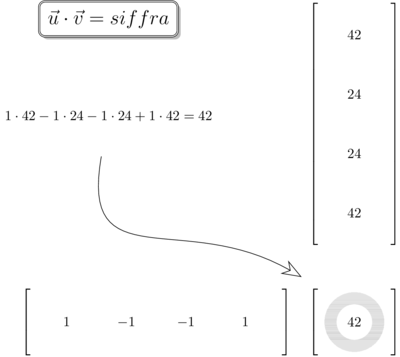

In [4]:
%%tikz -s 400,400 -sc 1. -f png -S scalarProd.png -l fit,calc,matrix,math,shadows,positioning,arrows,arrows.meta

\newcommand{\myunit}{1.5 cm}
\tikzset{
    matStyle/.style={circle,minimum size=\myunit}
}

\tikzmath{\halfunit=\myunit/2;
            \quartunit=\myunit-3mm;
}

\tikzset{
  nodeStyle2/.style={
    circle,
    minimum size=\myunit,
    inner sep=0pt,
    path picture={
     \draw[fill=black!20!white, draw = none, even odd rule ] (path picture bounding box.center) circle [radius=\halfunit]
                                                (path picture bounding box.center) circle [radius=0.45 cm];
    },
    font=\small
  }
}

\node [draw, fill=white, double, rounded corners, drop shadow, inner sep=6pt] (n) at (-1.2,7.65) {\fontsize{15}{15}\selectfont $\vec{u}\cdot \vec{v}=siffra$};
                  
\matrix (u) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (5,5)
{
    & {42} \\
    & {24} \\
    & {24} \\
    & {42} \\
};

 

\matrix (v) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (0,0)
{
  {1} & {-1} & {-1} & {1}\\
};

\matrix (z) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (5,0)
{
  & {42}\\
};

\node[nodeStyle2] at (z.center) {};


\node [below=5em of n.south] (arit) {$1 \cdot 42 -1 \cdot 24 -1\cdot 24+1 \cdot 42=42$};
\draw [-{Stealth[length=5mm, open]}, shorten >= 1.5em, shorten <= 2.2 em] (arit) to [out=260,in=150,looseness=1.5] (z.north west);






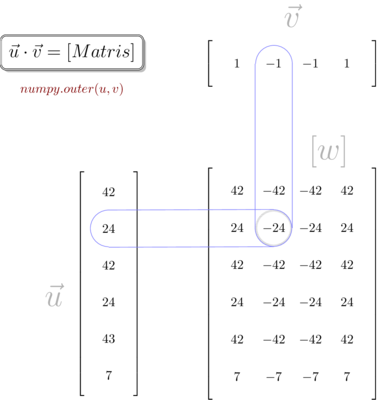

In [5]:
%%tikz -s 800,400 -f png -S outerProd.png -l fit,calc,matrix,math,shadows,positioning,arrows,arrows.meta
                                            

\newcommand{\myunit}{1.0 cm}
\tikzset{
    matStyle/.style={circle,minimum size=\myunit}
}

\tikzmath{\halfunit=\myunit/2;
            \quartunit=\myunit-6mm;
}

\tikzset{
  nodeStyle2/.style={
    circle,
    minimum size=\myunit,
    inner sep=0pt,
    path picture={
     \draw[fill=black!20!white, draw = none, even odd rule ] 
        (path picture bounding box.center) circle [radius=\halfunit]
                (path picture bounding box.center) circle [radius=0.45 cm];
    },
    font=\small
  }
}

\node [draw, fill=white, double, rounded corners, drop shadow, inner sep=6pt]
    (n) at (-1,6.3) 
        {\fontsize{15}{15}\selectfont $\vec{u}\cdot \vec{v}=[Matris]$};

\node [below, yshift = -2em, color=red!50!black] at (n) {$numpy.outer(u,v)$};                
\matrix (u) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (0,0)
{
    & {42} \\
    & {24} \\
    & {42} \\
    & {24} \\
    & {43} \\
    & {7} \\
};

 

\matrix (v) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (5,6)
{
  {1} & {-1} & {-1} & {1} \\
};

\matrix (W) [matrix of math nodes,
             nodes = {matStyle},
             left delimiter  = {[},
             right delimiter = {]}] at (5,0)
{
    42 & -42 & -42 & 42 \\
    24 & -24 & -24 & 24 \\
    42 & -42 & -42 & 42 \\
    24 & -24 & -24 & 24 \\
    42 & -42 & -42 & 42 \\
    7 & -7 & -7 & 7 \\
};

\node[nodeStyle2] at (W-2-2.center) {};
\draw[blue!50] (u-2-2.north) arc (90:270:.5);
\draw[blue!50] (v-1-2.east) arc (0:180:.5);
\draw[blue!50] (W-2-2.west) arc (180:450:.5);

% Blue lines
\draw[blue!50] (u-2-2.north) -- (W-2-2.north);
\draw[blue!50] (u-2-2.south) -- (W-2-2.south);
\draw[blue!50] (v-1-2.west)  -- (W-2-2.west);
\draw[blue!50] (v-1-2.east)  -- (W-2-2.east);


%\node[opacity=.3] at (-1.5,-0.3) {\Huge{$\vec{A}$}};
%\node[opacity=.3] at (5,7.3) {\Huge{$\vec{\frac{dL}{\vec{dZ_2}}}$}};
%\node[opacity=.3] at (5,4) {\Huge{$\vec{dW2}$}};
\node[opacity=.3] at (-1.5,-0.3) {\Huge{$\vec{u}$}};
\node[opacity=.3] at (5,7.3) {\Huge{$\vec{v}$}};
\node[opacity=.3] at (6,3.6) {\Huge{$[w]$}};







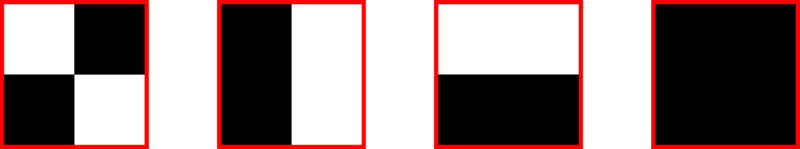

In [113]:
%%tikz -s 800,400 -f png -S patterns.png


% DIAG
% första rutan i diag
\fill[black] (0,0) rectangle (1,1);
% andra rutan i diag
\fill[black] (1,1) rectangle (2,2); 

% VERT
\fill[black] (3,0) rectangle (4,2);


% HOR
\fill[black] (6,0) rectangle (8,1); 

%solid
\fill[black] (9,0) rectangle (11,2); 

\draw [color=red, ultra thick] (0,0) rectangle (2,2);
\draw [color=red, ultra thick] (3,0) rectangle (5,2);
\draw [color=red, ultra thick] (6,0) rectangle (8,2);
\draw [color=red, ultra thick] (9,0) rectangle (11,2);

